In [1]:
import pandas as pd
import pandas_datareader.data as pd_data
import numpy as np
import datetime
import matplotlib.pyplot as plt
# setting for matplotlib
%matplotlib inline
# pandas configuration
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

In [5]:
# A) Fetching stock data
# Fetch data for the last three and half years from MSFT - Microsoft
# 2013 to June 2016
start = datetime.date(2013,1,1)
end = datetime.date(2016,6,30)

# collect data for a static defined stock
msft = pd_data.DataReader('MSFT', "yahoo", start, end)
msft[0:5]

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2013-01-02  27.25  27.73  27.15  27.62  52899300     25.046
2013-01-03  27.63  27.65  27.16  27.25  48294400     24.711
2013-01-04  27.27  27.34  26.73  26.74  52521100     24.248
2013-01-07  26.77  26.88  26.64  26.69  37110400     24.203
2013-01-08  26.75  26.79  26.46  26.55  44703100     24.076

In [6]:
# Let's define a function to do it 
def get(tickers,start,end):
    def data(ticker):
        return pd_data.DataReader(ticker,'yahoo',start,end)
    
    datas = map(data,tickers)
    
    return pd.concat(datas, keys=tickers, names=['Ticker','Date'])

In [7]:
# Now we get the data for a list of stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'KO']
all_data = get(tickers,start,end)
all_data[:5]

                     Open    High     Low   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2013-01-02  553.82  555.00  541.63  549.03  140129500     72.445
       2013-01-03  547.88  549.67  541.00  542.10   88241300     71.531
       2013-01-04  536.97  538.63  525.83  527.00  148583400     69.538
       2013-01-07  522.00  529.30  515.20  523.90  121039100     69.129
       2013-01-08  529.21  531.89  521.25  525.31  114676800     69.315

In [8]:
# B) Fetching Index data
# Get daily S&P500 
sp_500 = pd_data.DataReader("^GSPC",'yahoo',start,end)
sp_500[:5]

               Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2013-01-02  1426.19  1462.43  1426.19  1462.42  4202600000    1462.42
2013-01-03  1462.42  1465.47  1455.53  1459.37  3829730000    1459.37
2013-01-04  1459.37  1467.94  1458.99  1466.47  3424290000    1466.47
2013-01-07  1466.47  1466.47  1456.62  1461.89  3304970000    1461.89
2013-01-08  1461.89  1461.89  1451.64  1457.15  3601600000    1457.15

In [9]:
# Reset the index
closing_prices = all_data[['Adj Close']].reset_index()
closing_prices[:5]

  Ticker       Date  Adj Close
0   AAPL 2013-01-02     72.445
1   AAPL 2013-01-03     71.531
2   AAPL 2013-01-04     69.538
3   AAPL 2013-01-07     69.129
4   AAPL 2013-01-08     69.315

In [10]:
# Now we put the cp of stocks in columns
daily_close = closing_prices.pivot('Date','Ticker','Adj Close')
daily_close[:5]

Ticker         AA    AAPL      GE      IBM      KO    MSFT
Date                                                      
2013-01-02  8.615  72.445  19.002  177.007  33.818  25.046
2013-01-03  8.692  71.531  18.788  176.034  33.818  24.711
2013-01-04  8.874  69.538  18.877  174.880  33.872  24.248
2013-01-07  8.721  69.129  18.815  174.113  33.548  24.203
2013-01-08  8.721  69.315  18.610  173.870  33.314  24.076

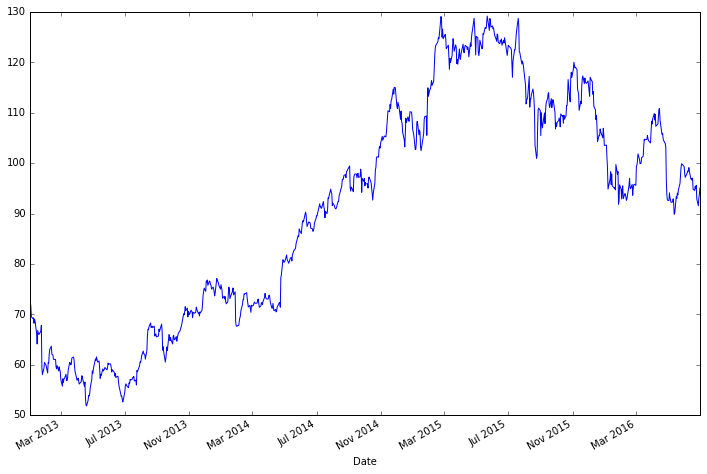

In [12]:
# plot Apple
_ = daily_close['AAPL'].plot(figsize=(12,8));
plt.savefig('DailyClosing_AAPL.png', bbox_inches='tight', dpi=300)

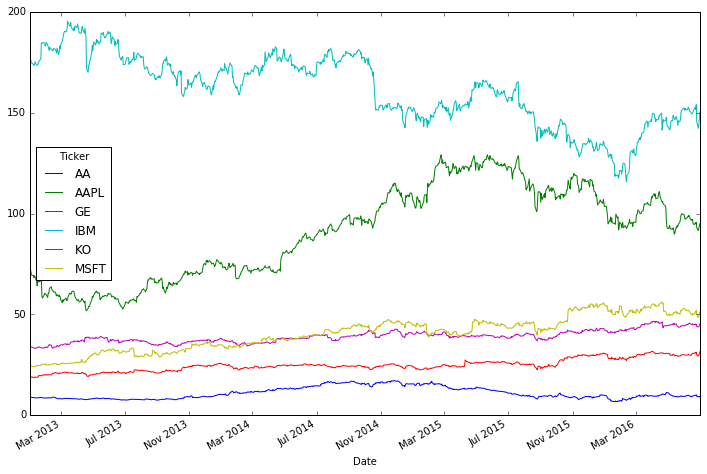

In [16]:
# now plot all in the same graph
_ = daily_close.plot(figsize=(12,8))
plt.savefig('DailyClosing_All.png', bbox_inches='tight', dpi=300, grid= True)

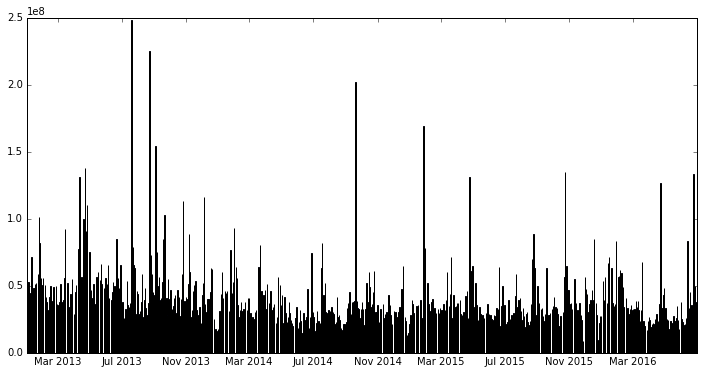

In [19]:
# now let's plot some volumes data
msftV = all_data.Volume.loc['MSFT']
plt.bar(msftV.index,msftV)
# setting plot size
plt.gcf().set_size_inches(12,6)
plt.savefig('VolumeAll.png', bbox_inches='tight', dpi=300)

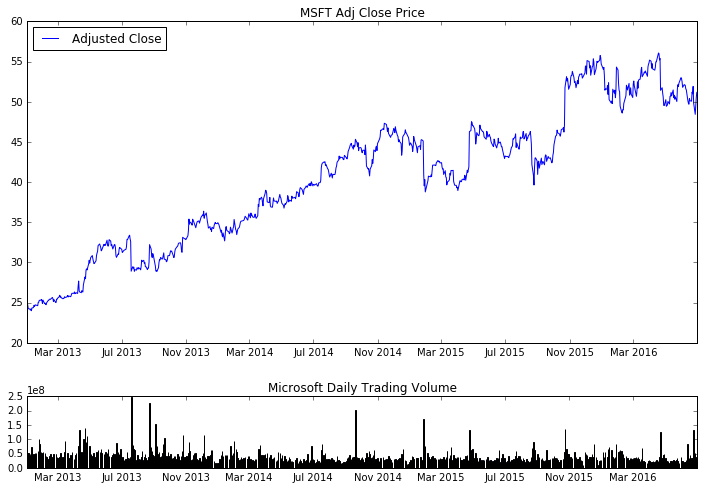

In [20]:
# Now we plot a combined graph of volume and price
# we need to create two area for the plot
top = plt.subplot2grid((4,4), (0,0), rowspan=3,colspan=4)
top.plot(daily_close.index,daily_close['MSFT'],label='Adjusted Close')
plt.title('MSFT Adj Close Price')
plt.legend(loc=2)

# now we plt in the bottom
bottom = plt.subplot2grid((4,4),(3,0), rowspan=1, colspan=4)
# draw bar
bottom.bar(msftV.index,msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
# set size
plt.subplots_adjust(hspace=0.75)
plt.savefig('Combined graph.png', bbox_inches='tight', dpi=300)

In [21]:
# plotting candlesticks of MSFT
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'].reset_index()
subset[:5]

        Date   Open   High    ...      Close    Volume  Adj Close
0 2014-12-01  47.88  48.78    ...      48.62  31191600     46.668
1 2014-12-02  48.84  49.05    ...      48.46  25743000     46.514
2 2014-12-03  48.44  48.50    ...      48.08  23534800     46.149
3 2014-12-04  48.39  49.06    ...      48.84  30320400     46.879
4 2014-12-05  48.82  48.97    ...      48.42  27313400     46.476

[5 rows x 7 columns]

In [22]:
# convert the date matplotlib representation
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High    ...       Volume  Adj Close  date_num
0 2014-12-01  47.88  48.78    ...     31191600     46.668    735568
1 2014-12-02  48.84  49.05    ...     25743000     46.514    735569
2 2014-12-03  48.44  48.50    ...     23534800     46.149    735570
3 2014-12-04  48.39  49.06    ...     30320400     46.879    735571
4 2014-12-05  48.82  48.97    ...     27313400     46.476    735572

[5 rows x 8 columns]

In [23]:
# extract only values required in order as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num','Open','High','Low','Close']].values]
subset_as_tuples[:5]

[(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999),
 (735569.0, 48.840000000000003, 49.049999, 48.200001, 48.459998999999996),
 (735570.0, 48.439999, 48.5, 47.810001, 48.080002),
 (735571.0, 48.389998999999996, 49.060001, 48.200001, 48.840000000000003),
 (735572.0, 48.82, 48.970001000000003, 48.380001, 48.419998)]

In [25]:
# required imports for formatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d') 
# we display label only for mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY)

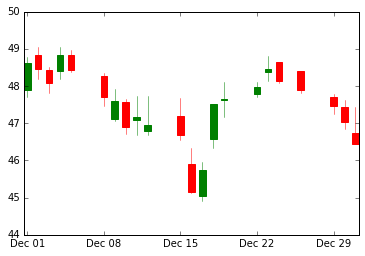

In [27]:
# DRAW
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
# set locator and axes
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw candlesticks
from matplotlib.finance import candlestick_ohlc
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6,colorup='g', colordown='r');
plt.savefig('Candlesticks.png', bbox_inches='tight', dpi=300)

In [28]:
# Calculating % change from day 0 to day 1 
AA_p_t0 = daily_close.iloc[0]['AA']
AA_p_t1 = daily_close.iloc[1]['AA']

r_t1 = AA_p_t1 / AA_p_t0 -1 
AA_p_t0, AA_p_t1, r_t1

(8.6154289999999989, 8.6920950000000001, 0.0088986862987323612)

In [29]:
# now we extend
dpc_1 = (daily_close.iloc[1:] /  daily_close.iloc[:-1].values) -1
dpc_1.ix[:,'AA':'AAPL']

Ticker         AA   AAPL
Date                    
2013-01-03  0.009 -0.013
2013-01-04  0.021 -0.028
2013-01-07 -0.017 -0.006
2013-01-08  0.000  0.003
2013-01-09 -0.002 -0.016
...           ...    ...
2016-06-24 -0.076 -0.028
2016-06-27 -0.030 -0.015
2016-06-28  0.025  0.017
2016-06-29 -0.025  0.009
2016-06-30  0.019  0.013

[880 rows x 2 columns]

In [30]:
# show the dataframe that is numerator
price_matrix_minus_day1 = daily_close.iloc[1:]
price_matrix_minus_day1[:5]

Ticker         AA    AAPL      GE      IBM      KO    MSFT
Date                                                      
2013-01-03  8.692  71.531  18.788  176.034  33.818  24.711
2013-01-04  8.874  69.538  18.877  174.880  33.872  24.248
2013-01-07  8.721  69.129  18.815  174.113  33.548  24.203
2013-01-08  8.721  69.315  18.610  173.870  33.314  24.076
2013-01-09  8.702  68.232  18.655  173.374  33.305  24.212

In [31]:
# the numerator is a 2d array, but excludes the last day
daily_close.iloc[:-1].values

array([[   8.615429,   72.444952,   19.002122,  177.00714 ,   33.817911,
          25.046437],
       [   8.692095,   71.530534,   18.788415,  176.033532,   33.817911,
          24.710912],
       [   8.874179,   69.538077,   18.87746 ,  174.879629,   33.871877,
          24.248432],
       ..., 
       [   9.073547,   91.544087,   29.32    ,  142.271255,   43.779999,
          48.43    ],
       [   9.302878,   93.085731,   29.940001,  144.452414,   44.18    ,
          49.439999],
       [   9.073547,   93.891372,   30.549999,  147.188791,   44.439999,
          50.540001]])

In [32]:
# using a shift function
dpc_2 = daily_close / daily_close.shift(1) -1
dpc_2.ix[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2013-01-02    NaN    NaN
2013-01-03  0.009 -0.013
2013-01-04  0.021 -0.028
2013-01-07 -0.017 -0.006
2013-01-08  0.000  0.003

In [33]:
# set Nan to 0
dpc_2.fillna(0, inplace=True)
dpc_2.ix[:5,:5]

Ticker         AA   AAPL     GE    IBM     KO
Date                                         
2013-01-02  0.000  0.000  0.000  0.000  0.000
2013-01-03  0.009 -0.013 -0.011 -0.006  0.000
2013-01-04  0.021 -0.028  0.005 -0.007  0.002
2013-01-07 -0.017 -0.006 -0.003 -0.004 -0.010
2013-01-08  0.000  0.003 -0.011 -0.001 -0.007

In [35]:
# calc the cumulative daily returns 
cum_daily_return = (1 + dpc_2).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker         AA   AAPL
Date                    
2013-01-02  1.000  1.000
2013-01-03  1.009  0.987
2013-01-04  1.030  0.960
2013-01-07  1.012  0.954
2013-01-08  1.012  0.957

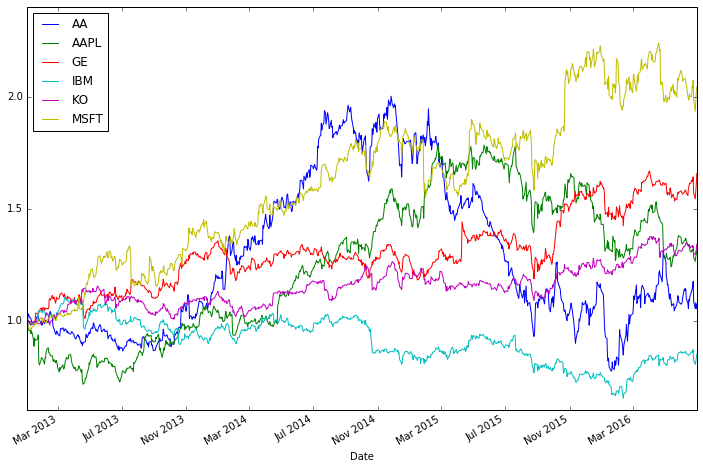

In [36]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
_ = plt.legend(loc=2);
plt.savefig('CumulativeReturns.png', bbox_inches='tight', dpi=300)

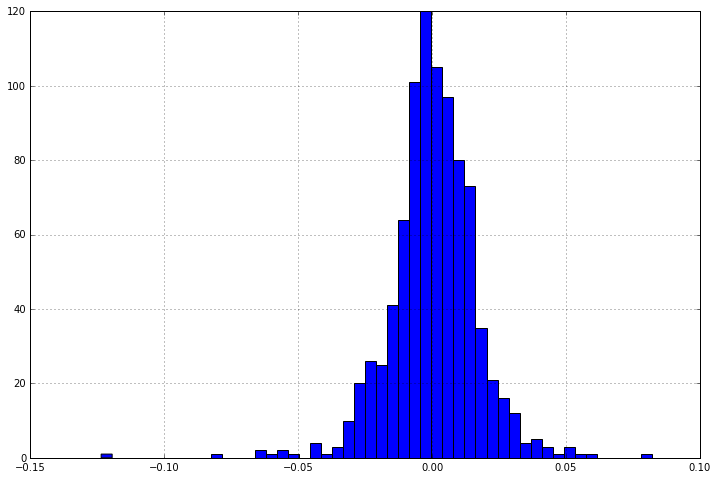

In [37]:
# ANALYZING DISTRIBUTION OF RETURNS
# Plot dayly % change values histogram for AAPL using 50bins
appl = dpc_2['AAPL']
_ = appl.hist(bins=50,figsize=(12,8));
plt.savefig('DistributionsOfReturns.png', bbox_inches='tight', dpi=300)

In [38]:
# get descriptive statistics
appl.describe()

count    8.810e+02
mean     4.426e-04
std      1.631e-02
min     -1.236e-01
25%     -7.516e-03
50%      2.236e-04
75%      9.772e-03
max      8.198e-02
Name: AAPL, dtype: float64

In [39]:
appl.describe(percentiles=[0.025,0.5,0.975])

count    8.810e+02
mean     4.426e-04
std      1.631e-02
min     -1.236e-01
2.5%    -3.106e-02
50%      2.236e-04
97.5%    3.100e-02
max      8.198e-02
Name: AAPL, dtype: float64

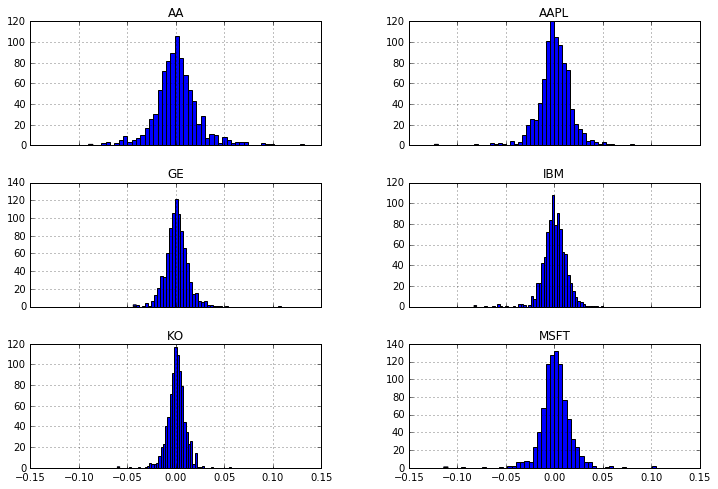

In [40]:
# plot all the cumulative return distributions
_ = dpc_2.hist(bins=50,sharex=True,figsize=(12,8));
plt.savefig('CumReturnDistributionsAll.png', bbox_inches='tight', dpi=300)

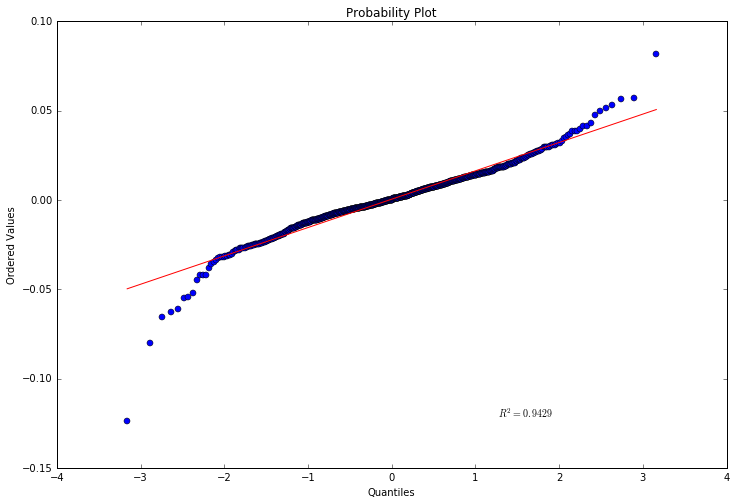

In [42]:
# create a qq-plot of AAPL return vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(appl,dist='norm', plot=ax)
plt.show()
plt.savefig('QQPlots.png', dpi=300)

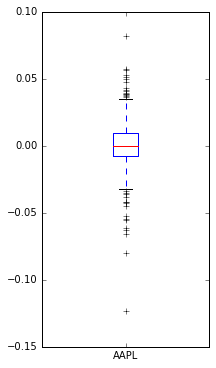

In [44]:
# Box and whisker plots
_ = dpc_2[['AAPL']].plot(kind='box',figsize=(3,6));
plt.savefig('BoxWhiskerPlots.png', dpi=300)

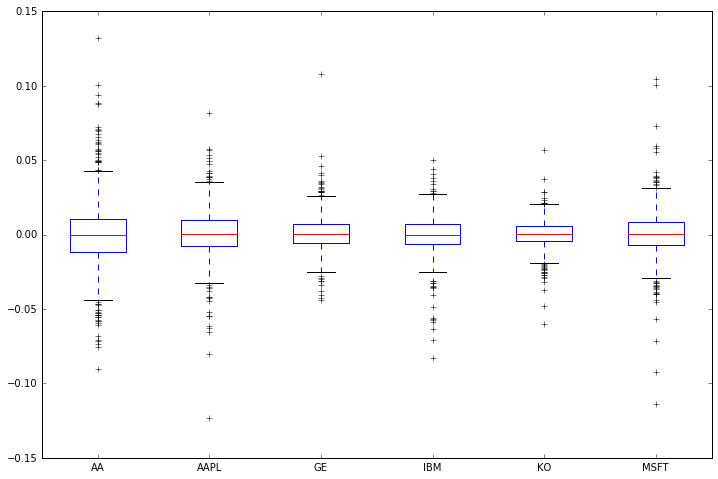

In [45]:
# examine all the returns 
dpc_2.plot(kind='box', figsize=(12,8));
plt.savefig('BoxWhiskerPlotsAll.png', dpi=300)

In [46]:
# COMPARISON OF DAILY % CHANGE BETWEEN STOCKS
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

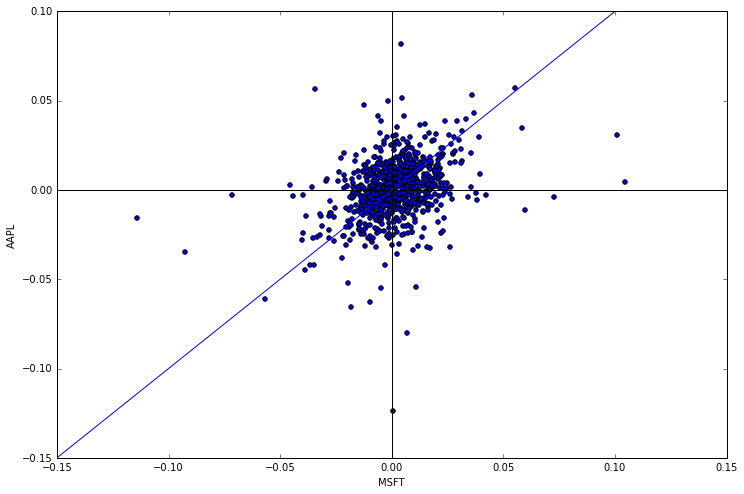

In [47]:
# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(dpc_2, 'MSFT', 'AAPL', xlim=limits)
plt.savefig('ComparisonMSFTAAPL.png', bbox_inches='tight', dpi=300)

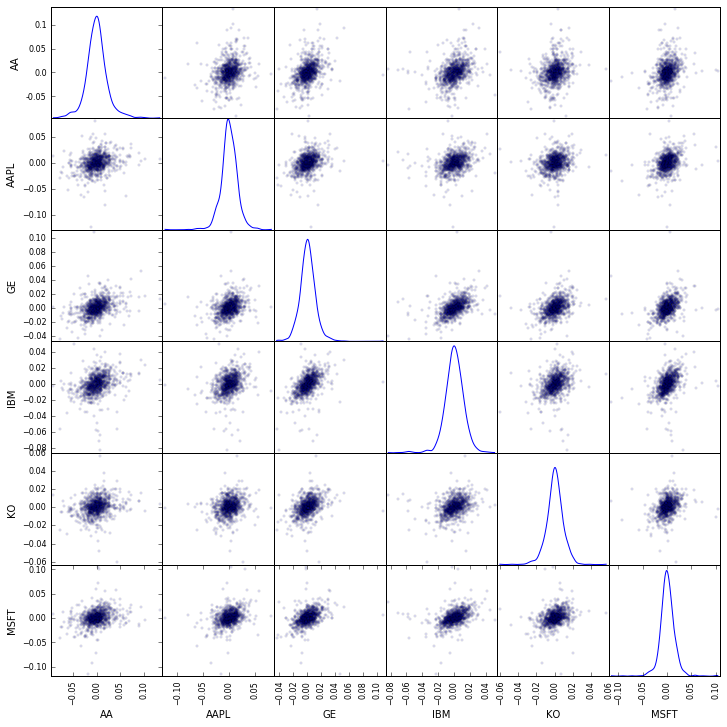

In [48]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(dpc_2, diagonal='kde', alpha=0.1,
                      figsize=(12,12));
plt.savefig('ComparisonALLALL.png', bbox_inches='tight', dpi=300)

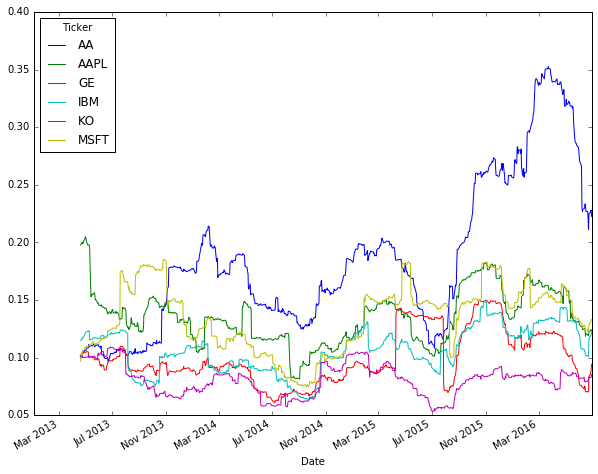

In [55]:
# Volatility Calculation
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(dpc_2, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));
plt.savefig('Volatility.png', bbox_inches='tight', dpi=300)

In [56]:
# Rolling correlation of returns
rolling_corr = pd.rolling_corr(dpc_2['AAPL'], 
                               dpc_2['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

Date
2014-12-30    0.232
2014-12-31    0.237
2015-01-02    0.233
2015-01-05    0.235
2015-01-06    0.239
              ...  
2016-06-24    0.604
2016-06-27    0.605
2016-06-28    0.605
2016-06-29    0.607
2016-06-30    0.607
dtype: float64

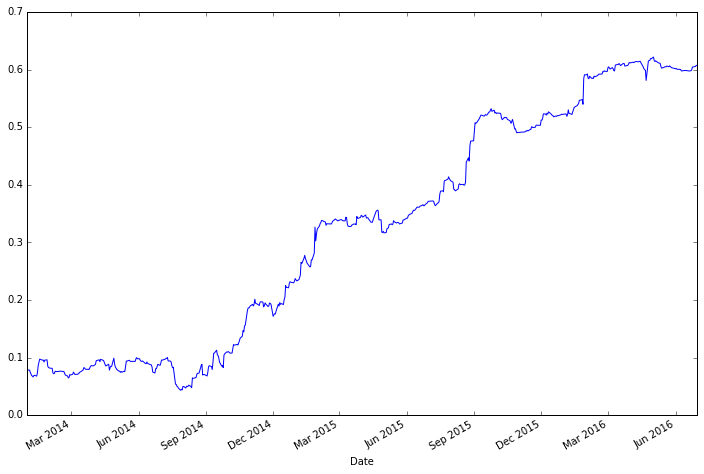

In [58]:
# plot the rolling correlation
_ = rolling_corr.plot(figsize=(12,8));
plt.savefig('RollingCorrelationReturns.png', bbox_inches='tight', dpi=300)

In [59]:
# Least squares regression of returns
model = pd.ols(y=dpc_2['AAPL'], 
               x={'MSFT': dpc_2['MSFT']}, 
               window=250)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.3688
Adj R-squared:     0.3662

Rmse:              0.0143

F-stat (1, 248):   144.8768, p-value:     0.0000

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.6200     0.0515      12.04     0.0000     0.5191     0.7210
     intercept    -0.0014     0.0009      -1.53     0.1285    -0.0031     0.0004
---------------------------------End of Summary---------------------------------

In [60]:
model.beta[0:5]


             MSFT  intercept
Date                        
2013-12-27  0.088  2.149e-04
2013-12-30  0.088  1.747e-04
2013-12-31  0.086  2.701e-04
2014-01-02  0.078  3.321e-04
2014-01-03  0.081  2.652e-04

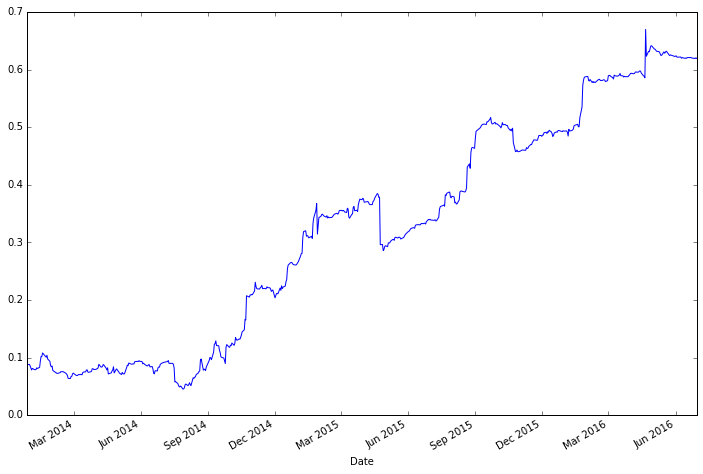

In [61]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
plt.savefig('RegressionAnalysis.png', bbox_inches='tight', dpi=300)

In [62]:
# Comparing stocks to the S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2013-01-02    0.000
2013-01-03   -0.002
2013-01-04    0.005
2013-01-07   -0.003
2013-01-08   -0.003
Name: Adj Close, dtype: float64

In [64]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, dpc_2], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

            SP500     AA   AAPL  ...      IBM     KO   MSFT
Date                             ...                       
2013-01-02  0.000  0.000  0.000  ...    0.000  0.000  0.000
2013-01-03 -0.002  0.009 -0.013  ...   -0.006  0.000 -0.013
2013-01-04  0.005  0.021 -0.028  ...   -0.007  0.002 -0.019
2013-01-07 -0.003 -0.017 -0.006  ...   -0.004 -0.010 -0.002
2013-01-08 -0.003  0.000  0.003  ...   -0.001 -0.007 -0.005

[5 rows x 7 columns]

In [65]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500     AA   AAPL  ...      IBM     KO   MSFT
Date                             ...                       
2013-01-02  1.000  1.000  1.000  ...    1.000  1.000  1.000
2013-01-03  0.998  1.009  0.987  ...    0.994  1.000  0.987
2013-01-04  1.003  1.030  0.960  ...    0.988  1.002  0.968
2013-01-07  1.000  1.012  0.954  ...    0.984  0.992  0.966
2013-01-08  0.996  1.012  0.957  ...    0.982  0.985  0.961

[5 rows x 7 columns]

In [66]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500     AA   AAPL  ...      IBM     KO   MSFT
SP500  1.000  0.498  0.492  ...    0.592  0.542  0.601
AA     0.498  1.000  0.246  ...    0.320  0.222  0.264
AAPL   0.492  0.246  1.000  ...    0.292  0.215  0.338
GE     0.716  0.388  0.313  ...    0.481  0.382  0.382
IBM    0.592  0.320  0.292  ...    1.000  0.326  0.397
KO     0.542  0.222  0.215  ...    0.326  1.000  0.305
MSFT   0.601  0.264  0.338  ...    0.397  0.305  1.000

[7 rows x 7 columns]

In [67]:
# how well did each stock relate to the S&P 500?
dpc_corrs.ix['SP500']

SP500    1.000
AA       0.498
AAPL     0.492
GE       0.716
IBM      0.592
KO       0.542
MSFT     0.601
Name: SP500, dtype: float64

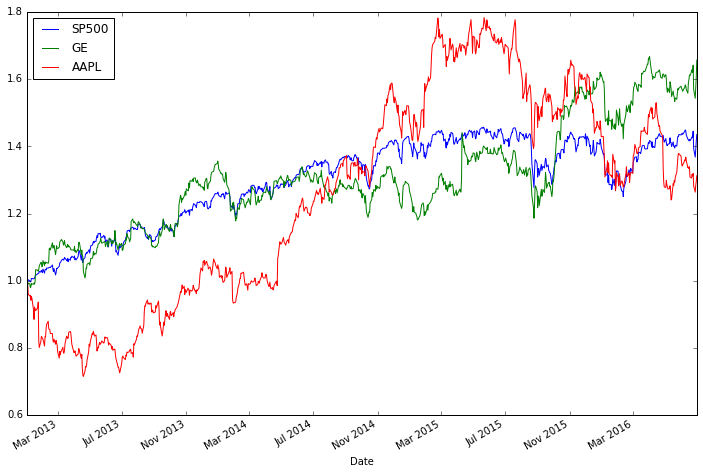

In [69]:
# plot GE/UAL against S&P500
_ = cdr_all[['SP500', 'GE', 'AAPL']].plot(figsize=(12,8));
plt.savefig('ComparisonToSEP500.png', bbox_inches='tight', dpi=300)

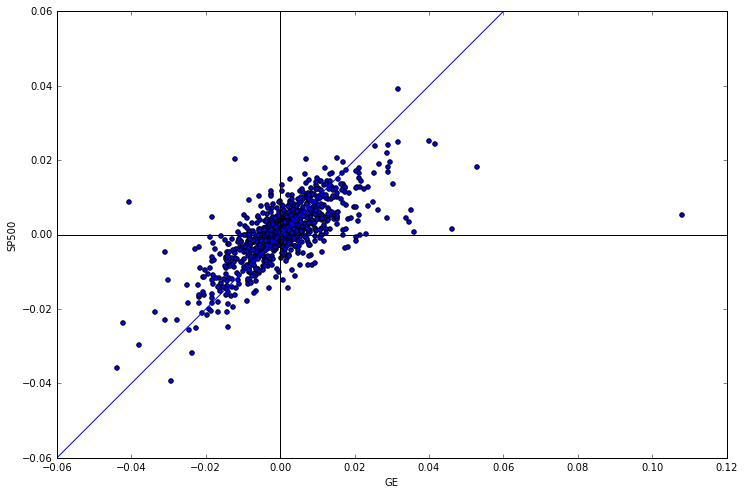

In [71]:
# GE vs S&P 500
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('C2.png', bbox_inches='tight', dpi=300)